In [ ]:
# @title Librerías

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from google.colab import drive # da acceso a los archivos que hay en drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Parte I
Analizar el dataset contenido en el siguiente enlace web:
https://www.kaggle.com/datasets/uciml/iris

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cuatri 1/Estadística Aplicada/Iris.csv")
display(df.head(5))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Limpiar los datos

In [ ]:
# Convertir en indice a la columna "Id", para no repetir la numeración en serie de 1-150
df.set_index("Id", inplace=True)

# Eliminar todas las columnas a excepción de las columnas (PetalLengthCm, Species)
df = df.drop(columns=["SepalLengthCm", "SepalWidthCm", "PetalWidthCm"])

# Observar si hay valores nulos
display(df.isnull().sum())
df

,0
PetalLengthCm,0
Species,0


,PetalLengthCm,Species
Id,,
1,1.4,Iris-setosa
2,1.4,Iris-setosa
3,1.3,Iris-setosa
4,1.5,Iris-setosa
5,1.4,Iris-setosa
...,...,...
146,5.2,Iris-virginica
147,5.0,Iris-virginica
148,5.2,Iris-virginica


## Solución
Para los datos de la variable petal_length construye lo siguiente:

1. Una tabla de distribución de frecuencias con 8 clases

In [ ]:
num_clases = 8
tabla = pd.cut(df['PetalLengthCm'], bins=num_clases) # crea una tabla con los rangos de las 8 clases, y cuantos valores tiene cada clase
frecuencias = pd.value_counts(tabla, sort=False)
tabla_frecuencias = pd.DataFrame({'Clase': frecuencias.index.astype(str), 'Frecuencia Absoluta': frecuencias.values})
display(tabla_frecuencias)
print("Total de Datos: ",tabla_frecuencias['Frecuencia Absoluta'].sum())

/tmp/ipython-input-449794107.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frecuencias = pd.value_counts(tabla, sort=False)


,Clase,Frecuencia Absoluta
0,"(0.994, 1.738]",48
1,"(1.738, 2.475]",2
2,"(2.475, 3.213]",1
3,"(3.213, 3.95]",10
4,"(3.95, 4.688]",29
5,"(4.688, 5.425]",32
6,"(5.425, 6.163]",22
7,"(6.163, 6.9]",6


Total de Datos:  150


2. Un histograma de frecuencias absolutas con los resultados obtenidos en el punto 1

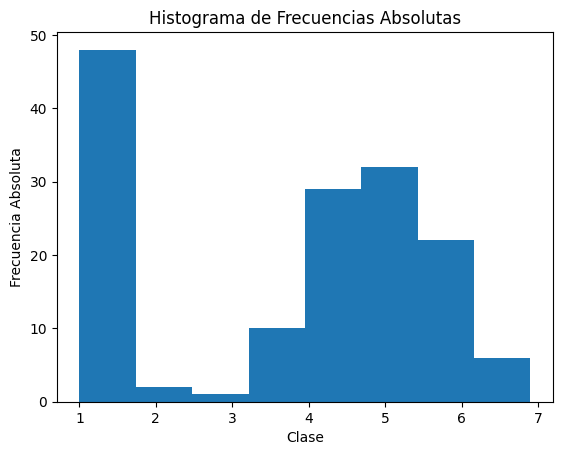

In [ ]:
plt.hist(df['PetalLengthCm'], bins=num_clases)
plt.xlabel('Clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Histograma de Frecuencias Absolutas')
plt.show()

3. Un polígono de frecuencias

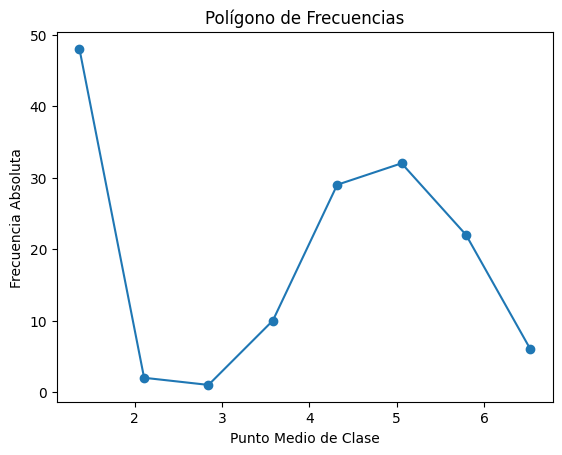

In [ ]:
# Calcular los puntos medios de clase y las frecuencias
intervalos = frecuencias.index
midpoints = [intervalo.mid for intervalo in intervalos]
plt.plot(midpoints, frecuencias.values, marker='o')
plt.xlabel('Punto Medio de Clase')
plt.ylabel('Frecuencia Absoluta')
plt.title('Polígono de Frecuencias')
plt.show()

4. Una ojiva

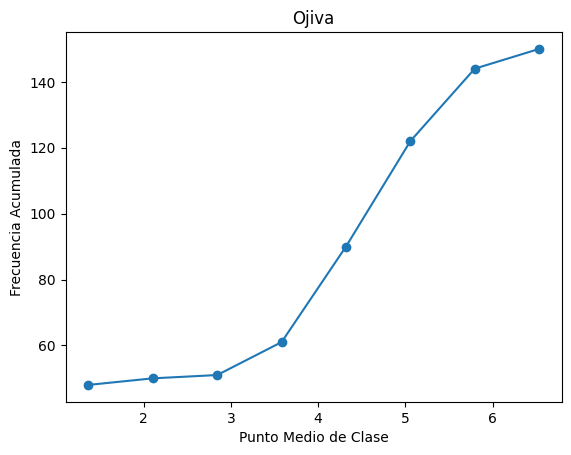

In [ ]:
# Frecuencia acumulada
frecuencia_acum = frecuencias.cumsum()
plt.plot(midpoints, frecuencia_acum, marker='o')
plt.xlabel('Punto Medio de Clase')
plt.ylabel('Frecuencia Acumulada')
plt.title('Ojiva')
plt.show()

5. La media aritmética, media geométrica, media armónica, media recortada al 5% en cada extremo, moda y mediana

In [ ]:
print(f"""
Media aritmética --> {df["PetalLengthCm"].mean().round(2)}
Media Geometrica --> {stats.gmean(df['PetalLengthCm']).round(2)}
Media Armónica --> {stats.hmean(df['PetalLengthCm']).round(2)}
Media Recortada --> {stats.trim_mean(df['PetalLengthCm'], 0.05).round(2)}
Moda --> {stats.mode(df['PetalLengthCm'], keepdims=True).mode}
Mediana --> {np.median(df['PetalLengthCm'])}
""")


Media aritmética --> 3.76
Media Geometrica --> 3.24
Media Armónica --> 2.7
Media Recortada --> 3.75
Moda --> [1.5]
Mediana --> 4.35



6. Rango, desviación absoluta media, varianza, desviación estándar y coeficiente de variación

In [ ]:
print(f"""
Rango --> {df['PetalLengthCm'].max() - df['PetalLengthCm'].min()}
Desviación Absoluta Media --> {stats.median_abs_deviation(df['PetalLengthCm']).round(2)}
Varianza --> {round(df['PetalLengthCm'].var(), 2)}
Desviación Estándar --> {round(df['PetalLengthCm'].std(), 2)}
Coeficiente de Variación --> {stats.variation(df['PetalLengthCm']).round(2)}
""")

# Otra forma de obtener el coeficiente de variación
# (desviacion_estandar / media_aritmetica) * 100


Rango --> 5.9
Desviación Absoluta Media --> 1.25
Varianza --> 3.11
Desviación Estándar --> 1.76
Coeficiente de Variación --> 0.47



7. Sesgo y curtosis

In [ ]:
print(f"""
Sesgo --> {stats.skew(df['PetalLengthCm'])}
Curtosis --> {stats.kurtosis(df['PetalLengthCm'])}
""")


Sesgo --> -0.2717119501716388
Curtosis --> -1.3953593021397128



8. Cuartiles, deciles, outlieres y el diagrama de caja y bigote

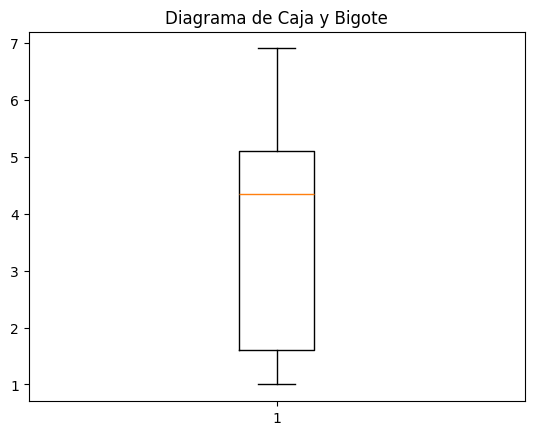

In [ ]:
cuartiles = np.percentile(df['PetalLengthCm'], [25, 50, 75])
deciles = np.percentile(df['PetalLengthCm'], np.arange(10, 100, 10))
q1, q3 = cuartiles[0], cuartiles[2]
iqr = q3 - q1
# Outliers
outliers = [x for x in df['PetalLengthCm'] if (x < q1 - 1.5 * iqr) or (x > q3 + 1.5 * iqr)]

# Diagrama de caja y bigote
plt.boxplot(df['PetalLengthCm'])
plt.title('Diagrama de Caja y Bigote')
plt.show()

# Parte II

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Cuatri 1/Estadística Aplicada/Tabla_1.csv")
df2.head(5)

,Registro,Causa de falla
0,1,Vibración excesiva
1,2,Sobrecalentamiento
2,3,Herramienta desgastada
3,4,Vibración excesiva
4,5,Herramienta desgastada


## Limpiar Datos

In [ ]:
# Verificar si tiene valores nulos
df2.isnull().sum()

,0
Registro,0
Causa de falla,0


## Solución
Para los datos de la Tabla 1 determinar lo siguiente:

9. Un diagrama de Pareto

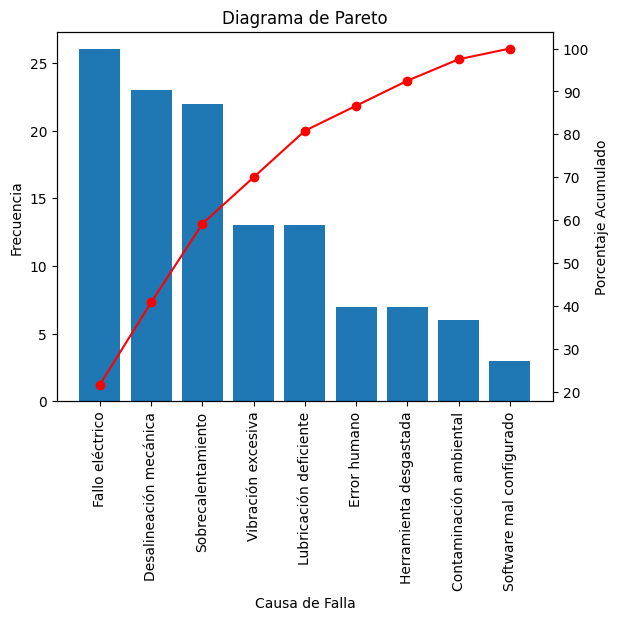

In [ ]:
# Calcular las frecuencias de cada causa de falla
frecuencias = df2['Causa de falla'].value_counts()

# Calcular las frecuencias acumuladas
frecuencias_acum = frecuencias.cumsum()

# Calcular los porcentajes
porcentajes = frecuencias / len(df2) * 100

# Calcular los porcentajes acumulados
porcentajes_acum = porcentajes.cumsum()

# Crear un DataFrame para el diagrama de Pareto
pareto_df = pd.DataFrame({
    'Frecuencia': frecuencias,
    'Frecuencia Acumulada': frecuencias_acum,
    'Porcentaje': porcentajes,
    'Porcentaje Acumulado': porcentajes_acum
})

# Ordenar por frecuencia descendente
pareto_df = pareto_df.sort_values(by='Frecuencia', ascending=False)

# Crear el diagrama de Pareto
fig, ax1 = plt.subplots()

ax1.bar(pareto_df.index, pareto_df['Frecuencia'])
ax1.set_xlabel('Causa de Falla')
ax1.set_ylabel('Frecuencia')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(pareto_df.index, pareto_df['Porcentaje Acumulado'], color='red', marker='o')
ax2.set_ylabel('Porcentaje Acumulado')

plt.title('Diagrama de Pareto')
plt.show()

10. Un diagrama de Pastel

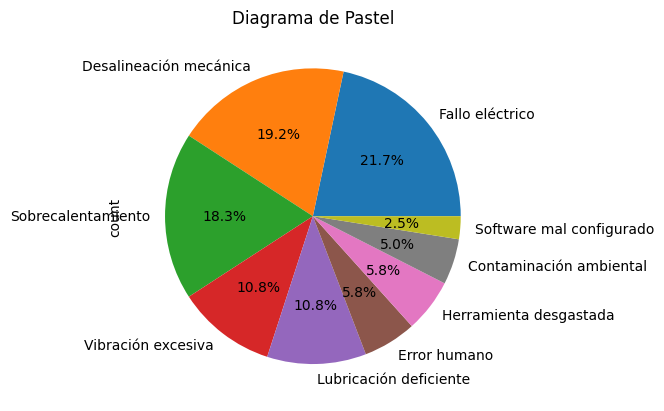

In [ ]:
df2['Causa de falla'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Diagrama de Pastel')
plt.show()